# Data preparation

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from pathlib import Path
import janitor

plt.style.use('seaborn-whitegrid')
plt.rcParams['figure.figsize'] = (8.0, 5.0)
plt.rcParams['axes.titlesize'] = 18
plt.rcParams['axes.labelsize'] = 15

data_dir = Path('../data')

## shRNA mapping

In [2]:
shrna_mapping_df = pd.read_csv(data_dir / 'shRNAmapping.csv').clean_names()
shrna_mapping_df.head()

,barcode_sequence,gene_symbol,gene_id
0,AAAAATGGCATCAACCACCAT,RPS6KA1,6195
1,AAAACCGTGGACTTCAAGAAG,NO_CURRENT_1,NO_CURRENT_1
2,AAAAGGATAACCCAGGTGTTT,TSC1,7248
3,AAAAGTGAGGACAATCCGCAA,RAPGEFL1,51195
4,AAAATCAGTCATGGTGATTTA,CECR2,27443


## Knock-down data

In [3]:
def load_achilles_lfc_data(fpath):
    df = pd.read_csv(data_dir / fpath) \
        .clean_names() \
        .rename({'unnamed_0': 'barcode_sequence'}, axis=1) \
        .melt(id_vars=['barcode_sequence'], var_name='cell_line', value_name='lfc')
    return df

In [4]:
achilles_55k_batch1_lfc = load_achilles_lfc_data('achilles55kbatch1repcollapsedlfc.csv')
achilles_55k_batch1_lfc.head()

,barcode_sequence,cell_line,lfc
0,ATATCCACCACTTTAACCTTA,ln215_central_nervous_system,-1.896471
1,GACAACAGACAAATCACCATT,ln215_central_nervous_system,-0.364165
2,GCCAGTGATTATGAGCTTGAA,ln215_central_nervous_system,-2.744832
3,GCTAAGTACAGGGCCAAGTTT,ln215_central_nervous_system,1.621193
4,AGAGCTGTTTGACCGGATAGT,ln215_central_nervous_system,-2.154795


In [5]:
achilles_55k_batch2_lfc = load_achilles_lfc_data('achilles55kbatch2repcollapsedlfc.csv')
achilles_55k_batch2_lfc.head()

,barcode_sequence,cell_line,lfc
0,ATATCCACCACTTTAACCTTA,ov7_ovary,-1.117770
1,GACAACAGACAAATCACCATT,ov7_ovary,-0.135925
2,CTAGAAAGAGTGCAGAACAAT,ov7_ovary,-1.932332
3,GCCAGTGATTATGAGCTTGAA,ov7_ovary,-1.145431
4,GCTAAGTACAGGGCCAAGTTT,ov7_ovary,0.441416


In [6]:
achilles_98k_lfc = load_achilles_lfc_data('achilles98krepcollapsedlfc.csv')
achilles_98k_lfc.head()

,barcode_sequence,cell_line,lfc
0,AAAAATGGCATCAACCACCAT,143b_bone,-0.146756
1,AAACACATTTGGGATGTTCCT,143b_bone,1.170334
2,AAAGAAGAAGCTGCAATATCT,143b_bone,1.490805
3,AAGCGTGCCGTAGACTGTCCA,143b_bone,0.543632
4,AATCTAAGAGAGCTGCCATCG,143b_bone,0.172294


## Original DEMETER2 results

In [7]:
def extract_gene_name(df):
    gene_names = [a.split(' ', 1)[0] for a in df['gene']]
    df['gene'] = gene_names
    return df

In [8]:
d2_res_path = Path('../data/D2_Achilles_gene_dep_scores.csv')

d2_res_df = pd.read_csv(d2_res_path) \
    .clean_names() \
    .rename({'unnamed_0': 'gene'}, axis=1) \
    .pipe(extract_gene_name)

d2_res_df.head()

,gene,143b_bone,22rv1_prostate,2313287_stomach,697_haematopoietic_and_lymphoid_tissue,769p_kidney,786o_kidney,a1207_central_nervous_system,a172_central_nervous_system,a204_soft_tissue,...,wm1799_skin,wm2664_skin,wm793_skin,wm88_skin,wm983b_skin,yd38_upper_aerodigestive_tract,yd8_upper_aerodigestive_tract,ykg1_central_nervous_system,zr751_breast,zr7530_breast
0,A1BG,0.052466,-0.115242,-0.023172,-0.023337,-0.127913,-0.045175,-0.180962,0.006975,-0.017205,...,-0.116620,-0.348762,0.015806,-0.183945,-0.071312,0.150626,-0.049987,0.011004,-0.149293,-0.167596
1,NAT2,0.084173,0.000951,-0.154188,-0.079006,-0.162207,-0.172578,-0.264920,-0.174468,-0.249258,...,-0.299439,-0.123712,-0.121711,-0.104603,-0.265162,0.021261,-0.158058,0.058858,-0.144623,0.133460
2,ADA,0.207020,0.010743,-0.072102,0.045611,-0.002487,0.170009,-0.000351,0.123135,-0.054149,...,0.060647,0.080939,0.331585,0.032316,-0.066345,0.061082,0.126664,0.204871,-0.202153,0.085652
3,CDH2,0.062192,-0.049809,0.022137,0.061709,-0.063397,0.127787,-0.184580,-0.040643,0.203570,...,-0.071168,0.004119,-0.013560,-0.048310,-0.138371,-0.036057,-0.075598,0.012575,0.044692,-0.055539
4,AKT3,0.039280,-0.076596,0.136445,0.154167,0.140487,0.243081,-0.143867,-0.026991,-0.192979,...,0.027439,-0.117479,-0.024036,0.119678,0.042359,0.107166,0.159401,0.071568,0.053298,0.021455


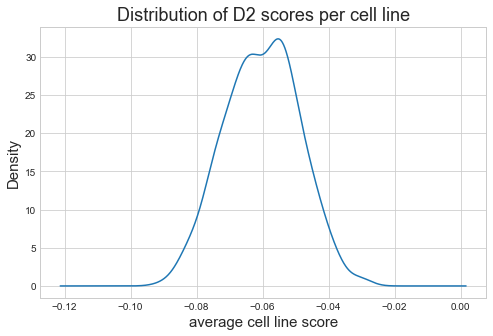

In [9]:
d2_res_df.mean().plot.kde()
plt.xlabel('average cell line score')
plt.title('Distribution of D2 scores per cell line')
plt.show()

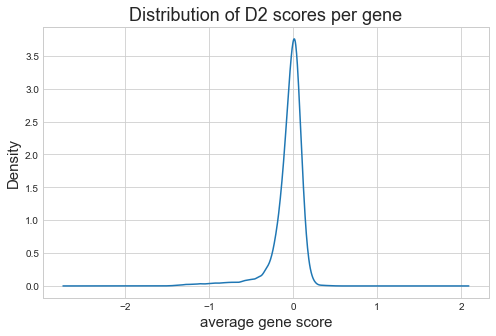

In [10]:
d2_res_df.set_index('gene').mean(axis=1).plot.kde()
plt.xlabel('average gene score')
plt.title('Distribution of D2 scores per gene')
plt.show()

In [11]:
pd.DataFrame(d2_res_df.set_index('gene').mean(axis=1), 
             columns=['avg_d2_score'])

,avg_d2_score
gene,
A1BG,-0.128559
NAT2,-0.062949
ADA,0.052180
CDH2,0.035571
AKT3,0.073588
...,...
PTBP3,-0.656251
KCNE2,-0.003405
DGCR2,0.050086


Set of genes where there will be differences across cell lines.

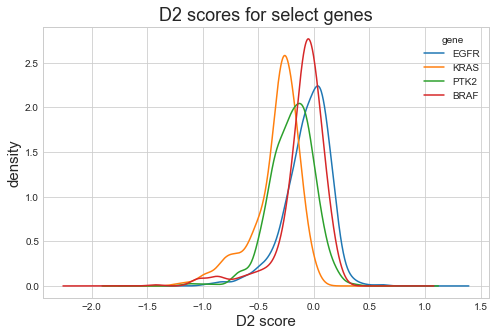

In [12]:
specific_test_genes = ['KRAS', 'BRAF', 'EGFR', 'PTK2']

d2_res_df[d2_res_df.gene.isin(specific_test_genes)].set_index('gene').T.plot.kde()

plt.xlabel('D2 score')
plt.ylabel('density')
plt.title('D2 scores for select genes')
plt.show()

A set of random genes.

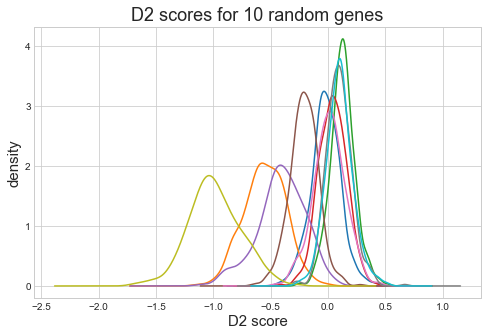

In [13]:
num_rand_genes = 10
random_genes = d2_res_df.dropna().sample(n=num_rand_genes, random_state=123)

random_genes.set_index('gene').T.plot.kde(legend=None)

plt.xlabel('D2 score')
plt.ylabel('density')
plt.title(f'D2 scores for {num_rand_genes} random genes')
plt.show()

Final subset of genes to experiment with.

In [14]:
genes_to_model = specific_test_genes + random_genes.gene.to_list()
genes_to_model

['KRAS',
 'BRAF',
 'EGFR',
 'PTK2',
 'RHBDL2',
 'ESPL1',
 'LOC105379645&KIR2DL2',
 'TRIM39',
 'SDHB',
 'COL8A1',
 'COG3',
 'GRK5',
 'EIF6',
 'RC3H2']

---

## Modeling data

In [15]:
model_data_dir = Path('../modeling_data')

### shRNA

In [16]:
model_shrna_mapping = shrna_mapping_df[shrna_mapping_df.gene_symbol.isin(genes_to_model)]
model_shrna_mapping = model_shrna_mapping.reset_index(drop=True).drop('gene_id', axis=1)
model_shrna_mapping.head()

,barcode_sequence,gene_symbol
0,ACAAATCCATTGAGCCTTATT,SDHB
1,ACAGAAGAAATTCTGGCAGAT,EIF6
2,ACCTCAATAAGGTCTCAAAAT,SDHB
3,ACGAGATGATAGAAACAGAAT,GRK5
4,ACTGATGTGTGTTAATTATGA,BRAF


In [17]:
model_shrna_mapping.to_csv(model_data_dir / "shRNA_mapping.csv")

### Log-fold-change data

In [18]:
achilles_55k_batch1_lfc['batch'] = 1
achilles_55k_batch2_lfc['batch'] = 2
achilles_98k_lfc['batch'] = 3

def filter_df_barcodes(df):
    new_df = df[df.barcode_sequence.isin(model_shrna_mapping.barcode_sequence)]
    return new_df

lfc_data = pd.concat(
    [filter_df_barcodes(achilles_55k_batch1_lfc),
     filter_df_barcodes(achilles_55k_batch2_lfc),
     filter_df_barcodes(achilles_98k_lfc)],
    ignore_index=True
)

lfc_data.head()

,barcode_sequence,cell_line,lfc,batch
0,CCAACCTCAATAAGGTCTCAA,ln215_central_nervous_system,0.898372,1
1,CGCAAGTGTAAGAAGTGCGAA,ln215_central_nervous_system,-2.754383,1
2,GCTCTCTATAGAAGGTTCTTT,ln215_central_nervous_system,0.589738,1
3,GCTGAGAATGTGGAATACCTA,ln215_central_nervous_system,-1.127432,1
4,AGAGAACTTCTACAGTGTGTT,ln215_central_nervous_system,-1.820344,1


In [19]:
lfc_data.shape

(45703, 4)

In [20]:
modeling_data = lfc_data \
    .set_index('barcode_sequence') \
    .join(model_shrna_mapping.set_index('barcode_sequence'), how='inner') \
    .reset_index()

modeling_data.head()

,barcode_sequence,cell_line,lfc,batch,gene_symbol
0,ACAGAAGAAATTCTGGCAGAT,ln215_central_nervous_system,1.966515,1,EIF6
1,ACAGAAGAAATTCTGGCAGAT,ln382_central_nervous_system,1.289606,1,EIF6
2,ACAGAAGAAATTCTGGCAGAT,efo21_ovary,0.625725,1,EIF6
3,ACAGAAGAAATTCTGGCAGAT,jhesoad1_oesophagus,1.392272,1,EIF6
4,ACAGAAGAAATTCTGGCAGAT,km12_large_intestine,0.820838,1,EIF6


In [21]:
modeling_data.to_csv(model_data_dir / 'subset_modeling_data.csv')